In [161]:
#Samantha Brayton
#March 2023
#Project 2 Data Analysis

In [16]:
import pandas as pd

In [17]:
import matplotlib.pyplot as plt

In [18]:
#import the original .csv file
df1 = "/Users/sambrayton/Desktop/DataSciProg/Project1/Fall_Comp.csv"

In [19]:
#import the clean .csv file
dfc = "/Users/sambrayton/Desktop/DataSciProg/Project2/cleaned_survey.csv"

In [20]:
df = pd.read_csv(dfc)
df = df.drop(columns=['Unnamed: 0'])

In [21]:
df.head()
deg=  df.groupby(['degree'])['degree'].count()
deg

degree
Academy Student                                     1
Biology                                             2
Business                                            9
CIS Game Development Option                         9
Challenger Program                                  4
Computer Science                                   83
Data Analytics Certificate of Achievement           1
Digital Media Technology                            5
Early Childhood Education                           1
Engineering                                        20
Finance                                             2
Highschool Student                                  2
Information Security Certificate of Achievement     1
Information Technology                             43
Liberal Arts                                        3
Mathematics                                         1
Music Recording                                     1
Non Degree seeking                                  3
Political Science    

In [123]:
demo = df[['course','degree','gender','race','age']]
demo

,course,degree,gender,race,age
0,CMP 128 Computer Science I,Computer Science,Man,White/Caucasian,19-20
1,NaN,Computer Science,Man,White/Caucasian,25-34
2,CMP 128 Computer Science I,Liberal Arts,Woman,White/Caucasian,19-20
3,CMP 128 Computer Science I,Computer Science,Man,Asian,18 and younger
4,CMP 128 Computer Science I,Information Technology,Man,White/Caucasian,25-34
...,...,...,...,...,...
213,CMP 131 Fundamentals of Programming (Python),Information Technology,Man,Multi-Racial,21-24
214,CMP 128 Computer Science I,Computer Science,Man,Asian,19-20
215,CMP 128 Computer Science I,"Technical Studies, Applied Associate of Science",Man,White/Caucasian,25-34
216,CMP 128 Computer Science I,Computer Science,Man,Multi-Racial,21-24


In [133]:
#1. How many students from each different class responded to the survey? 
course = df.groupby(['course']).course.count()
course

course
CMP 128 Computer Science I                      150
CMP 130 Intro to IT                               9
CMP 131 Fundamentals of Programming (Python)     34
CMP 239 Internet & Web Page Design               24
Name: course, dtype: int64

In [119]:
#2. What are the gender distribution?
#gender = demo.groupby('gender').count().reset_index()
gender1 = demo.groupby(['gender']).gender.count()
gender1

gender
I do not identify      3
Man                  163
Non-binary             3
Prefer not to say      7
Woman                 42
Name: gender, dtype: int64

In [75]:
#3. What is the racial/ethnic diversity?
#race= demo.groupby('race').count().reset_index()
ethnicity = demo.groupby(['race']).race.count()
ethnicity

race
American Indian/Native American/Alaska Native     1
Asian                                            32
Black/African American                            4
Choose not to reply                              12
Hispanic or Latino                               44
Multi-Racial                                     33
White/Caucasian                                  92
Name: race, dtype: int64

In [126]:
#4. What is the age distribution for the survey?
age = demo.groupby(['age']).age.count()
age

age
18 and younger    78
19-20             70
21-24             42
25-34             15
35-64             10
65+                3
Name: age, dtype: int64

In [77]:
#What events of the Department of IT had the most and least participants?
events = df.drop(columns=['course','degree','gender', 'race', 'age'])
attendance = (events == 'Yes').sum()
most = attendance.sort_values(ascending=[False]).head(5)
most

individual_campus_visit    69
oncampus_info_session      63
open_house                 52
hs_info_session.1          47
virtual_info_session       29
dtype: int64

In [78]:
least = attendance.sort_values().head(5)
least

corporate_training             1
women_who_dare                 2
ccm_summer_camp                4
workforce_development_class    5
hour_of_code                   6
dtype: int64

In [79]:
#What is the gender ratio among the different courses?
gender_ratio = demo.groupby(['course','gender']).course.count()
gender_ratio

course                                        gender           
CMP 128 Computer Science I                    I do not identify      3
                                              Man                  114
                                              Non-binary             1
                                              Prefer not to say      6
                                              Woman                 26
CMP 130 Intro to IT                           Man                    8
                                              Woman                  1
CMP 131 Fundamentals of Programming (Python)  Man                   24
                                              Non-binary             2
                                              Woman                  8
CMP 239 Internet & Web Page Design            Man                   16
                                              Prefer not to say      1
                                              Woman                  7
Name: course,

In [100]:
#Females under the age of 25
#fem_under = dfc.drop(columns=['open_house', 'instant_decision_day', 'oncampus_info_session','virtual_info_session', 'women_who_dare', 'college_fair','hs_info_session', 'challenger_program','cybersecurity_info_protection_prog', 'hs_info_session.1','hs_campus_visit', 'individual_campus_visit','workforce_development_class', 'corporate_training','teen_arts_festival', 'ccm_summer_camp', 'hour_of_code'])
#fem_under

#fem_under = df[['course','degree','gender','race','age']]
#fem_under


population = demo[((demo.age == '18 and younger') | (demo.age == '19-20') | (demo.age == '21-24'))&(demo.gender == 'Woman')]
#population = population.drop(columns=['gender'])
population.head()

,course,degree,gender,race,age
2,CMP 128 Computer Science I,Liberal Arts,Woman,White/Caucasian,19-20
11,CMP 128 Computer Science I,Business,Woman,Multi-Racial,18 and younger
33,CMP 128 Computer Science I,Computer Science,Woman,Hispanic or Latino,18 and younger
34,CMP 128 Computer Science I,Computer Science,Woman,Asian,18 and younger
37,CMP 128 Computer Science I,Challenger Program,Woman,American Indian/Native American/Alaska Native,19-20


In [103]:
#Population enrolled in IT related degree program
it_related = population[(population.degree == 'Computer Science')|(population.degree == 'Data Analytics Certificate of Achievement')|(population.degree == 'Information Security Certificate of Achievement')|(population.degree == 'Information Technology')|(population.degree == 'Web Development Certificate of Achievement')]
it_related = it_related.groupby(['race']).race.count()
it_related

race
Asian                 6
Hispanic or Latino    5
Multi-Racial          6
White/Caucasian       2
Name: race, dtype: int64

In [99]:
#Population degree programs 
pop_deg = population.groupby(['degree']).degree.count()
pop_deg

degree
Biology                                        1
Business                                       3
CIS Game Development Option                    3
Challenger Program                             2
Computer Science                              12
Data Analytics Certificate of Achievement      1
Digital Media Technology                       1
Early Childhood Education                      1
Engineering                                    3
Information Technology                         5
Liberal Arts                                   1
Psychology                                     1
ShareTime CSIP Program                         2
Web Development Certificate of Achievement     1
Name: degree, dtype: int64

In [160]:
#course = df.groupby(['course']).course.count()
#course

summ = demo.describe()
summ

,course,degree,gender,race,age
count,217,218,218,218,218
unique,4,24,5,7,6
top,CMP 128 Computer Science I,Computer Science,Man,White/Caucasian,18 and younger
freq,150,83,163,92,78


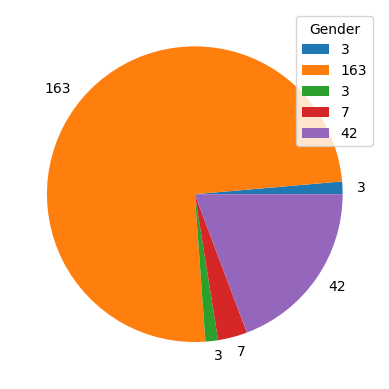

In [152]:
plt.pie(gender1, labels=gender1)
plt.legend(title="Gender")